In [1]:
pwd

'C:\\data\\udacity'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import iqr

In [ ]:
def quantile_IQR(distnames, x):
    #ax = plt.subplot()
    num_sim = 100
    for distname in distnames:
        if distname == 'uniform':
            dist = getattr(stats, distname)(loc=-2, scale=4)
        else:
            dist = getattr(stats, distname)
        data = dist.rvs(size=1000)
        kur = kurtosis(data, fisher=True)
        y = dist.pdf(x)
     #   print('IQR_' + distname + ' = ' + str(iqr(data)))
      #  ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
       # ax.legend()

25%_Quantile = -0.6927092328165779


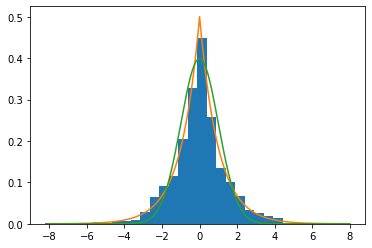

In [49]:
loc, scale = 0., 1.


s = np.random.laplace(loc, scale, 1000)
print('25%_Quantile = '+ str(np.quantile(s,0.25)))

count, bins, ignored = plt.hist(s, 30, density=True)
x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
plt.plot(x, pdf)


g = (1/(scale * np.sqrt(2 * np.pi)) *
     np.exp(-(x - loc)**2 / (2 * scale**2)))
plt.plot(x,g)

In [84]:

def quant_trials(no_trails, loc, scale, sample_size=1000):
    lower_q = []
    upper_q = []
    kur=[]
    for i in range(no_trails):
        #s = np.random.laplace(loc, scale, sample_size)
        s = np.random.normal(loc, scale, sample_size)
        lower_q.append(np.quantile(s,0.25))
        upper_q.append(np.quantile(s,0.75))
        kur.append(kurtosis(s, fisher=True))
        
    return(lower_q,upper_q,kur)
    

In [85]:
loc = 0.
scale = [0.25,0.5,1.0,1.5,2.]
num_samples = 1000

lower_q_mean=[]
upper_q_mean=[]
kur_mean=[]
no_trails = 1000
for s in scale:
    lower_q, upper_q ,kur= quant_trials(no_trails,loc,s,num_samples)
    lower_q_mean.append(np.mean(lower_q))
    upper_q_mean.append(np.mean(upper_q))
    kur_mean.append(np.mean(kur))
       
    

-0.3763146890382998

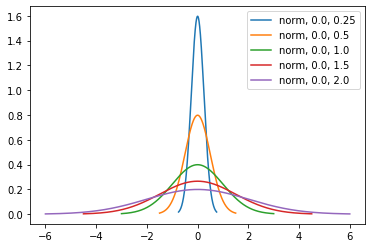

In [3]:
loc = 0.
scale = [0.25,0.5,1.0,1.5,2.]
num_samples = 1000
ax = plt.subplot()
distname = 'norm'
dist = getattr(stats, distname)

for s in scale:
    #samples = np.random.laplace(loc, s, num_samples)
    #x = np.random.normal(loc, s, num_samples)
    x = np.linspace(-3*s, 3*s, 1000)
    y = stats.norm.pdf(x, loc, s)
    #print('IQR_' + distname + ' = ' + str(iqr(data)))
    #print('Quantile_0.25_' + distname + ' = ' + str(np.quantile(data,0.25)))
    #print('Quantile_0.75_' + distname + ' = ' + str(np.quantile(data,0.75)))
    ax.plot(x, y, label="{}, {}, {}".format(distname, loc, s))

ax.legend()

np.random.normal()


In [86]:
print(lower_q_mean)
print(upper_q_mean)
print(kur_mean)

[-0.1681486076358919, -0.3369647730485806, -0.674389908813857, -1.0053862913133735, -1.34815785081398]
[0.1682683008759717, 0.33784249914976205, 0.6732172589185018, 1.010291870841573, 1.3476567216270048]
[-0.0016380144973386196, -0.014254537175443626, -0.002160812668608849, 0.0040958612830699175, -0.007493978014309221]


IQR_laplace = 1.3839106856267716
Quantile_0.25_laplace = -0.691626320933441
Quantile_0.75_laplace = 0.6922843646933307
IQR_norm = 1.3505009386308107
Quantile_0.25_norm = -0.6742528909660697
Quantile_0.75_norm = 0.676248047664741
IQR_uniform = 1.9941846431337171
Quantile_0.25_uniform = -1.0018981825355753
Quantile_0.75_uniform = 0.992286460598142


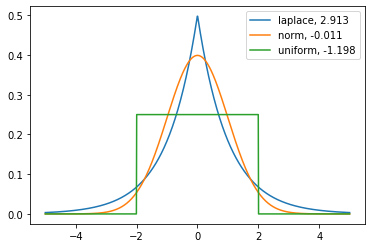

In [23]:

x = np.linspace(-5, 5, 1000)

distnames = ['laplace', 'norm', 'uniform']


ax = plt.subplot()
for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    print('IQR_' + distname + ' = ' + str(iqr(data)))
    print('Quantile_0.25_' + distname + ' = ' + str(np.quantile(data,0.25)))
    print('Quantile_0.75_' + distname + ' = ' + str(np.quantile(data,0.75)))
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()